# Synthetic Data Testing with SDV Lite (FAST_ML)
This notebook loads your dataset, preprocesses it, trains a FAST_ML synthetic model, generates synthetic data, and evaluates a model trained on synthetic vs. real data.

In [1]:
#  Install required packages
!pip install sdv==1.4.0 pandas scikit-learn

In [2]:
#  Import libraries
import pandas as pd
from sdv.lite import SingleTablePreset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv("/content/7. Working copy labs 10042025 with GP codes and distance to lab.csv")
df.head()

,Respondent sequence number,Date Sample Taken,Time Sample Taken,Date received into lab,Time received into lab,Date Result Reported,Time Result Reported,Apolipoprotein B g/L,Albumin g/dL,Albumin g/L,...,Triglyceride mmol/L,LDL cholesterol mmol/L,2 hour glucose OGTT mmol/L,Time from fasrt glucose and challenge (min),Time from fast glucose and OGTT (min),Time from glucose challenge and OGTT (min),Amount of glucose challenge drank,"Total length of 'food fast', hours","Total length of 'food fast', minutes",Total cholesterol mmol/L
0,73557,02/13/2023,06:22:00 PM,02/13/2023,06:22:00 PM,02/15/2023,09:18:00 AM,NaN,4.1,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.32
1,73558,02/09/2023,11:00:00 AM,02/09/2023,04:50:00 PM,02/10/2023,02:19:00 PM,NaN,4.7,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2,73559,01/17/2023,09:45:00 AM,01/17/2023,03:56:00 PM,01/18/2023,03:31:00 PM,0.57,3.7,37,...,0.576,1.448,NaN,NaN,NaN,NaN,NaN,15,51,3.26
3,73560,01/11/2023,04:16:00 PM,01/11/2023,04:47:00 PM,01/12/2023,12:18:00 PM,NaN,4.3,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.34
4,73561,01/23/2023,12:44:00 PM,01/23/2023,02:01:00 PM,01/23/2023,03:26:00 PM,0.92,4.3,43,...,0.847,2.612,NaN,NaN,NaN,NaN,3,14,42,5.2


In [16]:
# 🧼 Select useful numeric lab features and clean the data
features = [
    'Cholesterol mmol/L', 'Glucose, refridgerated serum mmol/L',
    'Triglycerides, refridgerated mmol/L', 'Haemoglobin (g/dL)',
    'White blood cell count (1000 cells/µL)',
    'Red Blood Cell Count (million cells/µL)',
    'Total cholesterol mmol/L'
]
df_subset = df[features].apply(pd.to_numeric, errors='coerce').dropna()

# Create a binary target column
df_subset['Target'] = (df_subset['Total cholesterol mmol/L'] > 5).astype(int)
df_subset.head()

,Cholesterol mmol/L,"Glucose, refridgerated serum mmol/L","Triglycerides, refridgerated mmol/L",Haemoglobin (g/dL),White blood cell count (1000 cells/µL),Red Blood Cell Count (million cells/µL),Total cholesterol mmol/L,Target
0,4.344,30.75,1.581,15.2,4.7,5.09,4.32,0
1,4.319,12.16,2.902,11.9,12.6,3.84,4.40,0
2,3.284,10.16,0.576,17.2,7.2,5.53,3.26,0
3,4.400,5.00,2.210,12.9,7.8,4.61,4.34,0
4,5.353,5.77,0.994,14.5,6.6,4.72,5.20,1


In [19]:
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset

# ✅ Step 1: Include full dataframe including 'Target'
full_data = df_subset.copy()

# ✅ Step 2: Generate metadata for the full dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=full_data)

# ✅ Step 3: Train the FAST_ML model using full data
model = SingleTablePreset(name='FAST_ML', metadata=metadata)
model.fit(full_data)


In [20]:
# 🧬 Generate synthetic data
synthetic_data = model.sample(num_rows=len(df_subset))
synthetic_data['Target'] = df_subset['Target'].values
synthetic_data.head()

,Cholesterol mmol/L,"Glucose, refridgerated serum mmol/L","Triglycerides, refridgerated mmol/L",Haemoglobin (g/dL),White blood cell count (1000 cells/µL),Red Blood Cell Count (million cells/µL),Total cholesterol mmol/L,Target
0,5.747093,6.196757,3.225476,13.500603,7.680008,4.214349,5.498384,0
1,4.252663,8.005904,2.038667,13.127031,3.163413,4.454048,3.902511,0
2,6.047029,6.030747,1.825386,14.652056,9.321649,4.887962,5.197731,0
3,7.645435,5.613420,2.562784,14.525846,5.108537,5.089922,7.154866,0
4,4.894509,9.447598,2.802648,14.636620,8.700995,5.261310,5.212080,1


In [21]:
# 🧪 Train on synthetic, test on real
X_syn = synthetic_data.drop(columns='Target')
y_syn = synthetic_data['Target']

X_real = df_subset.drop(columns='Target')
y_real = df_subset['Target']

clf = RandomForestClassifier()
clf.fit(X_syn, y_syn)
y_pred = clf.predict(X_real)

accuracy = accuracy_score(y_real, y_pred)
print(f"✅ Accuracy (trained on synthetic, tested on real): {accuracy:.2f}")

✅ Accuracy (trained on synthetic, tested on real): 0.67


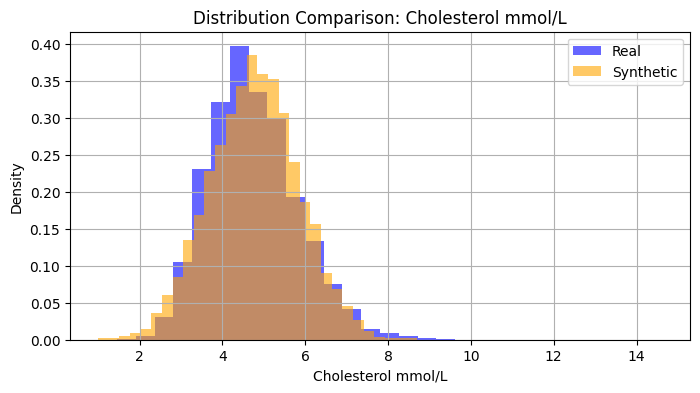

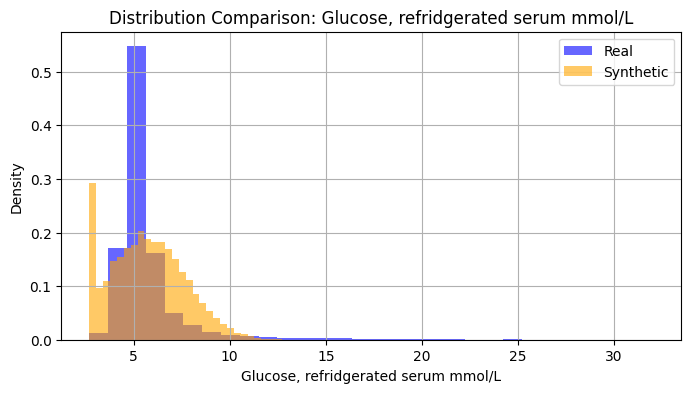

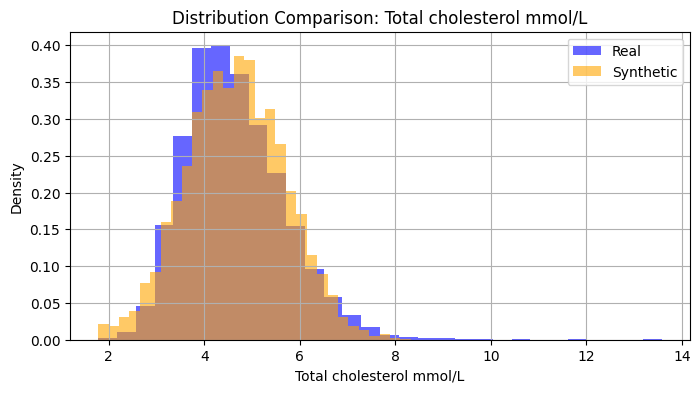

In [22]:
import matplotlib.pyplot as plt

# Plot distributions for a few key columns
columns_to_plot = ['Cholesterol mmol/L', 'Glucose, refridgerated serum mmol/L', 'Total cholesterol mmol/L']

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(df_subset[col], bins=30, alpha=0.6, label='Real', color='blue', density=True)
    plt.hist(synthetic_data[col], bins=30, alpha=0.6, label='Synthetic', color='orange', density=True)
    plt.title(f"Distribution Comparison: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()


UTility test

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the real data into features and label
X_real = df_subset.drop(columns='Target')
y_real = df_subset['Target']

# Split the synthetic data too
X_syn = synthetic_data.drop(columns='Target')
y_syn = synthetic_data['Target']

# Train on synthetic, test on real
model = RandomForestClassifier(random_state=42)
model.fit(X_syn, y_syn)

y_pred = model.predict(X_real)
accuracy = accuracy_score(y_real, y_pred)

print(f"Accuracy when trained on synthetic and tested on real: {accuracy:.4f}")


Accuracy when trained on synthetic and tested on real: 0.6660


KS Test

In [24]:
from scipy.stats import ks_2samp

for column in X_real.columns:
    stat, p_value = ks_2samp(X_real[column], X_syn[column])
    print(f"{column}: KS statistic = {stat:.4f}, p-value = {p_value:.4f}")


Cholesterol mmol/L: KS statistic = 0.0541, p-value = 0.0000
Glucose, refridgerated serum mmol/L: KS statistic = 0.2437, p-value = 0.0000
Triglycerides, refridgerated mmol/L: KS statistic = 0.1562, p-value = 0.0000
Haemoglobin (g/dL): KS statistic = 0.0318, p-value = 0.0009
White blood cell count (1000 cells/µL): KS statistic = 0.0792, p-value = 0.0000
Red Blood Cell Count (million cells/µL): KS statistic = 0.0309, p-value = 0.0014
Total cholesterol mmol/L: KS statistic = 0.0593, p-value = 0.0000


A Random Forest trained on synthetic data achieved 66.6% accuracy on real data, showing the synthetic data preserved useful patterns.

KS tests indicated good distributional similarity for some features (e.g., haemoglobin, RBC), but significant differences for glucose and triglycerides.

Visualizations confirmed overall structural similarity between real and synthetic datasets.

The FAST_ML model worked well for general data generation but struggled with skewed or complex distributions.

